<div style="margin: 0 auto; text-align: center; width: 500px;">
    <h1><font color='#7985E0'>Tugas 02</font><font color='#F29496'> Pemrosesan Citra Digital</font></h1>
<div>

<div>
    <div style="margin: 0 auto; text-align: center; width: 500px;">
        <img src="https://drive.google.com/uc?id=1Y2Qa88dTnR80uhwDQ-qyMc3wye9CcMdx" alt="foto" style="width:250px; height:250px"><br>
        <b>
            <font color="#7985E0">
                Iman Mustika Ismail<br>
                H071201050<br>
                Pemrosesan Citra Digital - B
            </font></b>
    </div>
</div>

---
<div class="alert alert-block alert-info">
    <h2>Table of Contents<a class="anchor" id="tableOfContents"></a></h2>
    <ul>
        <li><a href="#libraryy">Library</a></li>
        <li><a href="#num1">No. 1</a></li>
        <li><a href="#num2">No. 2</a></li>
        <li><a href="#num3">No. 3</a></li>
        <li><a href="#num4">No. 4</a></li>
    </ul>
</div>

## Library<a class="anchor" id="libraryy"></a>
---

In [14]:
# Importing library
import numpy as np
from math import pi
from skimage import filters, feature
from skimage.io import imread
from skimage.color import rgb2gray
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter, median_filter
import matplotlib.pylab as pylab

import warnings 
warnings.filterwarnings('ignore')

## Nomor 1 <a class="anchor" id="num1"></a>
---

1. Diberikan citra **rice.png**, lakukan deteksi tepi pada citra tersebut dan jelaskan perbedaan hasilnya menggunakan operator _Laplace_ dan operator _Laplace of Gaussian_ (LoG) berikut:<br>
<div style="margin: 0 auto; text-align: center; width: 500px;">
        <img src="https://drive.google.com/uc?id=1aSMNfNum7I-o-ObCRu9l_DlvRmliHJ_V" alt="foto" style="width:700px; height:200px">
</div>

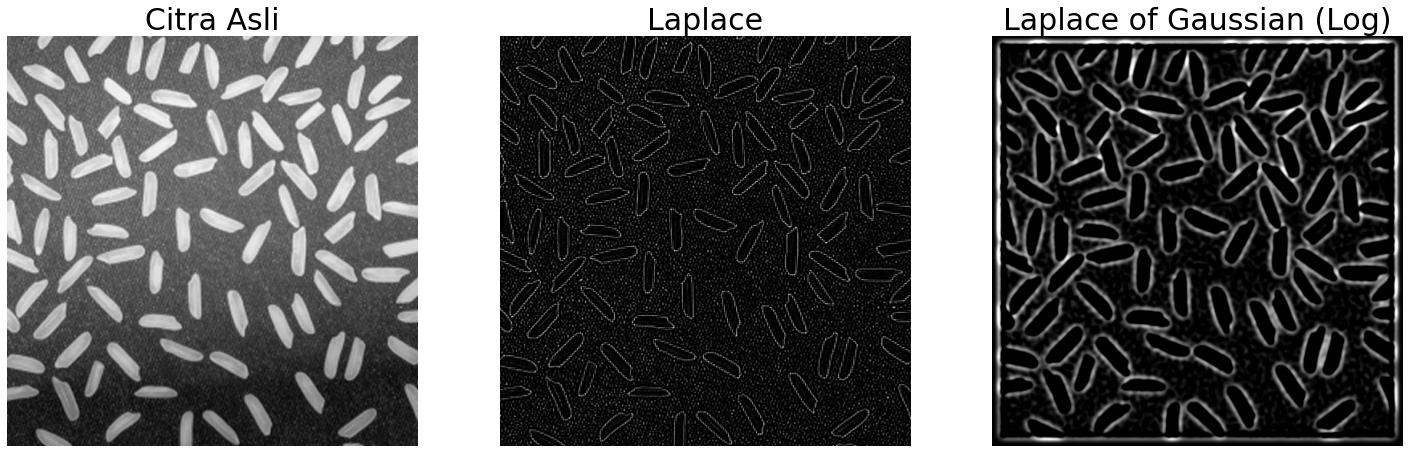

In [15]:
# Read image
img_rice = rgb2gray(imread('rice.png'))

# Edge detector using Laplace filter
img_rice_laplace = np.clip(filters.laplace(img_rice), 0, 1)

# Edge detector using Laplace of Gaussian (LoG) filter
def LOG(k=12, s=3):
    n = 2 * k + 1 # kernel size
    kernel = np.zeros((n, n))
    for i in range (n):
        for j in range (n):
            kernel[i,j] = -(1-((i-k)**2+(j-k)**2)/(2.*s**2))*np.exp(-((i-k)**2+(j-k)**2)/(2.*s**2))/(pi*s**4)
    kernel = np.round(kernel / np.sqrt((kernel**2).sum()),3)
    return kernel

kernel = LOG()
img_rice_LoG = np.clip(convolve2d(img_rice, kernel) ,0, 1)

# Displaying image
pylab.figure(figsize=(25,10))
pylab.subplot(131)
pylab.imshow(img_rice, cmap='gray')
pylab.axis('off')
pylab.title('Citra Asli', fontsize=30)
pylab.subplot(132)
pylab.imshow(img_rice_laplace, cmap='gray')
pylab.axis('off')
pylab.title('Laplace', fontsize=30)
pylab.subplot(133)
pylab.imshow(img_rice_LoG, cmap='gray')
pylab.axis('off')
pylab.title('Laplace of Gaussian (Log)', fontsize=30)
pylab.show()

- **_Laplace_**<br>
_Laplace_ $L(x,y)$ dari suatu citra dengan nilai intensitas _pixel_ $I(x,y)$ dengan persamaan: <br>
$$\large L(x,y) = \large \frac{\partial^2I}{\partial x^2} + \frac{\partial^2I}{\partial y^2}$$<br>
Ini dapat dihitung dengan menggunakan filter konvolusi. Karena citra masukan direpresentasikan sebagai kumpulan _pixel_ diskrit, kita harus menemukan kernel konvolusi diskrit yang dapat mendekati turunan kedua dalam definisi _Laplace_. Kernel diatas merupakan kernel kecil yang umum digunakan, dengan menggunakan kernel tersebut _Laplace_ dapat dihitung menggunakan metode konvolusi standar. Karena kernel ini mendekati pengukuran turunan kedua pada citra, sangat sensitif dengan _noise_. Untuk mengatasi ini, citra sering kali dihaluskan dengan _Gaussian_ sebelum menerapkan filter _Laplace_. Langkah pra-pemrosesan ini mengurangi komponen _noise_ frekuensi tinggi sebelum langkah diferensiasi.
- **_Laplace of Gaussian_ (LoG)**<br>
Faktanya, karena operasi konvolusi adalah asosiatif, kita dapat mengkonvulusi filter pemulusan _Gaussian_ dengan filter _Laplace_ terlebih dahulu, dan kemudian mengkonvulusi filter hybrid ini dengan citra untuk mencapai hasil yang diperlukan. Melakukan hal-hal dengan cara ini memiliki dua keuntungan: 
    1) Karena kernel _Gaussian_ dan _Laplace_ biasanya jauh lebih kecil daripada citra, metode ini biasanya membutuhkan operasi aritmatika yang jauh lebih sedikit.
    2) Kernel LoG (_'Laplacian of Gaussian'_) dapat dihitung sebelumnya sehingga hanya satu konvolusi yang perlu dilakukan saat _run-time_ pada citra. Fungsi 2-D LoG berpusat pada nol dan dengan standar deviasi _Gaussian_ $\sigma$ memiliki bentuk:<br>
$$\large LoG(x,y) = \large -\frac{1}{\pi \sigma^4} \Bigg[1 - \frac{x^2 + y^2}{2\sigma^2}\Bigg] e^{-\frac{x^2 + y^2}{2\sigma^2}}$$<br>
Kernel LoG diatas merupakan contoh penapis LoG berukuran $5 \times 5$, kemudian dapat dilakukan _mask_ konvolusi dengan $\sigma = 1.4$.

Perbedaan citra dengan filter _Laplace_ dan filter _Laplace of Gaussian_ (LoG) adalah pada _Laplace_ memiliki garis tepi yang lebih tipis dari LoG, ini karena LoG melewati proses _Gaussian_ terlebih dahulu sebelum di melakukan _Laplace_, sehingga membuat garis tepi LoG lebih tebal dan pada _Laplace_ masih mendeteksi _background_ pada citra sedangkan pada LoG _background_ yang diddeteksi sudah samar-samar

## Nomor 2<a class="anchor" id="num2"></a>
---

2. Lakukan filter _Sobel_, _Prewitt_, _Roberts_ untuk deteksi tepi pada citra **boat.tiff**, **lena.bmp**, **bird.bmp**, dan **peppers.tiff**. Tentukan dan jelaskan metode terbaik untuk masing-masing citra.

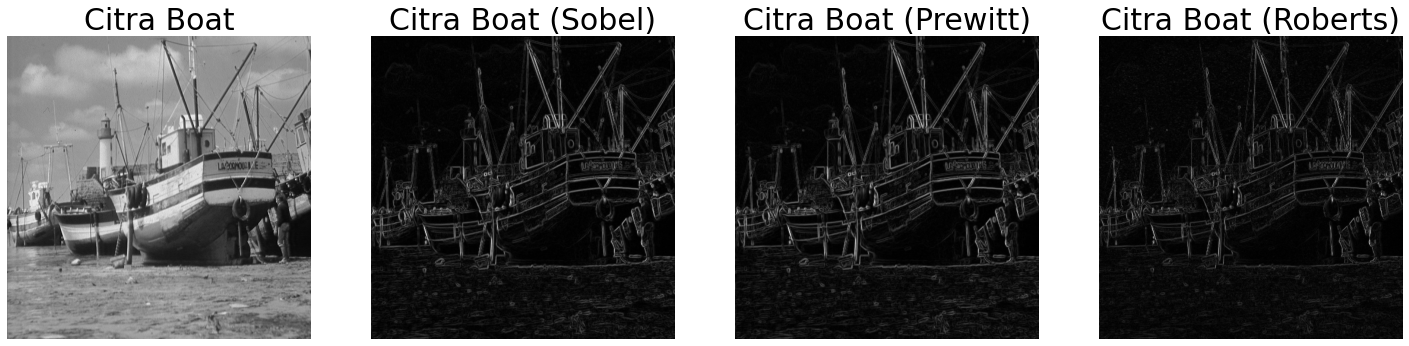

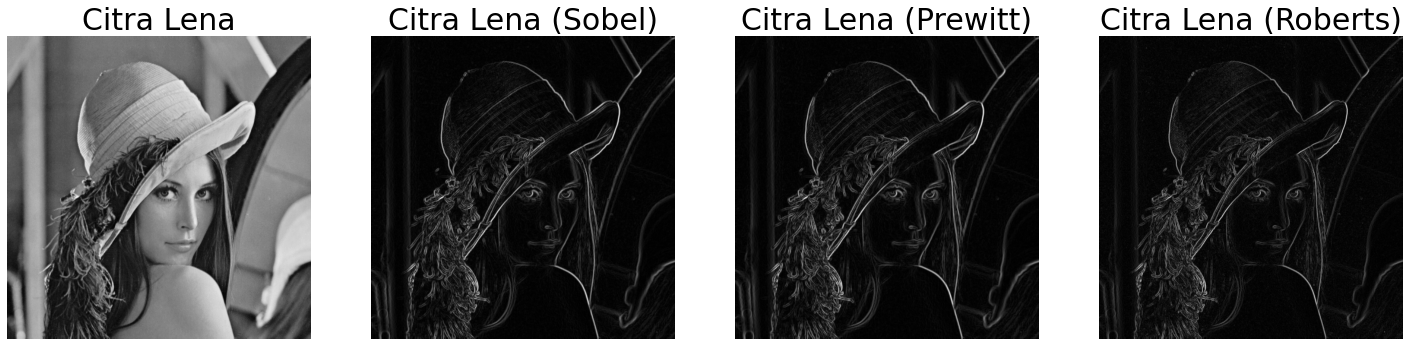

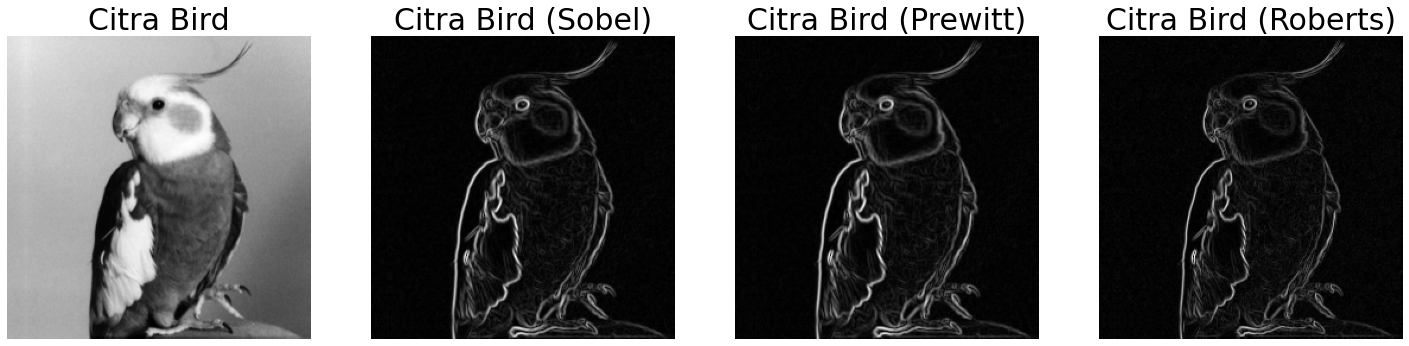

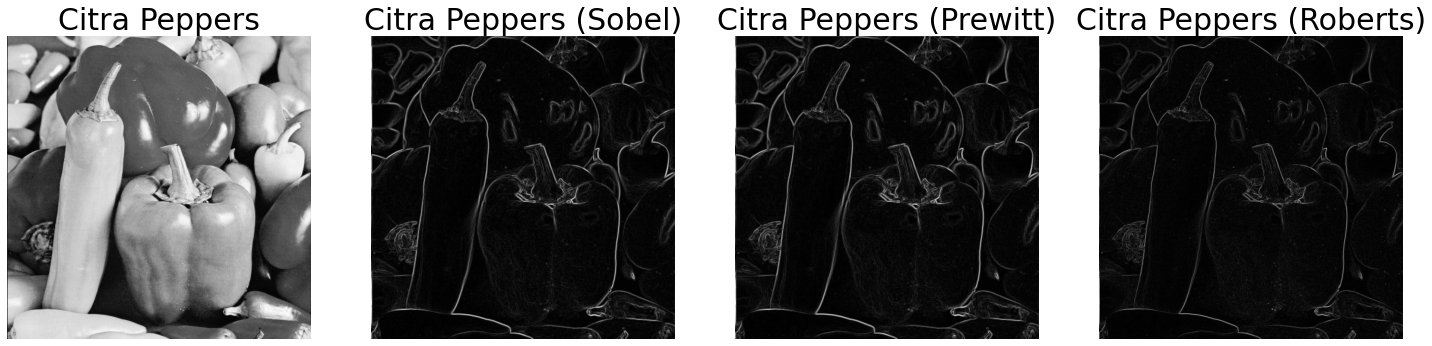

In [16]:
# Read image
img_boat = rgb2gray(imread('boat.tiff'))
img_lena = rgb2gray(imread('lena.bmp'))
img_bird = rgb2gray(imread('bird.bmp'))
img_peppers = rgb2gray(imread('peppers.tiff'))

# Edge detector using Sobel filter
img_boat_sobel = filters.sobel(img_boat)
img_lena_sobel = filters.sobel(img_lena)
img_bird_sobel = filters.sobel(img_bird)
img_peppers_sobel = filters.sobel(img_peppers)

# Edge detector using Prewitt filter
img_boat_prewitt = filters.prewitt(img_boat)
img_lena_prewitt = filters.prewitt(img_lena)
img_bird_prewitt = filters.prewitt(img_bird)
img_peppers_prewitt = filters.prewitt(img_peppers)

# Edge detector using Roberts filter
img_boat_roberts = filters.roberts(img_boat)
img_lena_roberts = filters.roberts(img_lena)
img_bird_roberts = filters.roberts(img_bird)
img_peppers_roberts = filters.roberts(img_peppers)

# Displaying image
def display(nama, asli, sobel, prewitt, roberts):
    pylab.figure(figsize=(25,10))
    pylab.subplot(141)
    pylab.imshow(asli, cmap='gray')
    pylab.axis('off')
    pylab.title(nama, fontsize=30)
    pylab.subplot(142)
    pylab.imshow(sobel, cmap='gray')
    pylab.axis('off')
    pylab.title(nama + ' (Sobel)', fontsize=30)
    pylab.subplot(143)
    pylab.imshow(prewitt, cmap='gray')
    pylab.axis('off')
    pylab.title(nama + ' (Prewitt)', fontsize=30)
    pylab.subplot(144)
    pylab.imshow(roberts, cmap='gray')
    pylab.axis('off')
    pylab.title(nama + ' (Roberts)', fontsize=30)
    
display("Citra Boat", img_boat, img_boat_sobel, img_boat_prewitt, img_boat_roberts)
display("Citra Lena", img_lena, img_lena_sobel, img_lena_prewitt, img_lena_roberts)
display("Citra Bird", img_bird, img_bird_sobel, img_bird_prewitt, img_bird_roberts)
display("Citra Peppers", img_peppers, img_peppers_sobel, img_peppers_prewitt, img_peppers_roberts)
pylab.show()

- **Citra Boat**<br>
Metode _edge detector_ terbaik untuk citra **boat** adalah metode _edge detector prewitt_ karena _prewitt_ bagus digunakan untuk mendeteksi objek yang banyak bahkan objek yang berfungsi sebagai _background_ berhasil dideteksi, deteksi tepi yang dihasilkan lebih halus dibandingkan dengan _roberts_.
- **Citra Lena**<br>
Metode _edge detector_ terbaik untuk citra **lena** adalah metode _edge detector prewitt_ karena _prewitt_ bagus digunakan untuk mendeteksi objek yang memiliki detail kecil seperti rambut , deteksi tepi yang dihasilkan lebih halus dibandingkan dengan _roberts_.
- **Citra Bird**<br>
Metode _edge detector_ terbaik untuk citra **bird** adalah metode _edge detector sobel_ karena _sobel_ bagus digunakan untuk citra yang memiliki 1 objek di dalamnya, _sobel_ dapat mendeteksi tepi objek tetapi tidak semua objek berhasil dideteksi, maka citra dengan objek yang sedikit didalamnya dapat di deteksi tanpa mendeteksi objek yang berfungsi sebagai _background_ citra.
- **Citra Peppers**<br>
Metode _edge detector_ terbaik untuk citra **peppers** adalah metode _edge detector roberts_ karena _roberts_ bagus digunakan untuk mendeteksi objek yang memerlukan tepi yang tebal, objek yang kecil (_background_) juga ikut terdeteksi, tetapi terdapat tepi-tepi halus yang tidak terdeteksi sehingga terlihat hilang.

## Nomor 3<a class="anchor" id="num3"></a>
---

3. Lakukan deteksi tepi pada citra **lena_noise.jpg** dengan filter _Canny_.

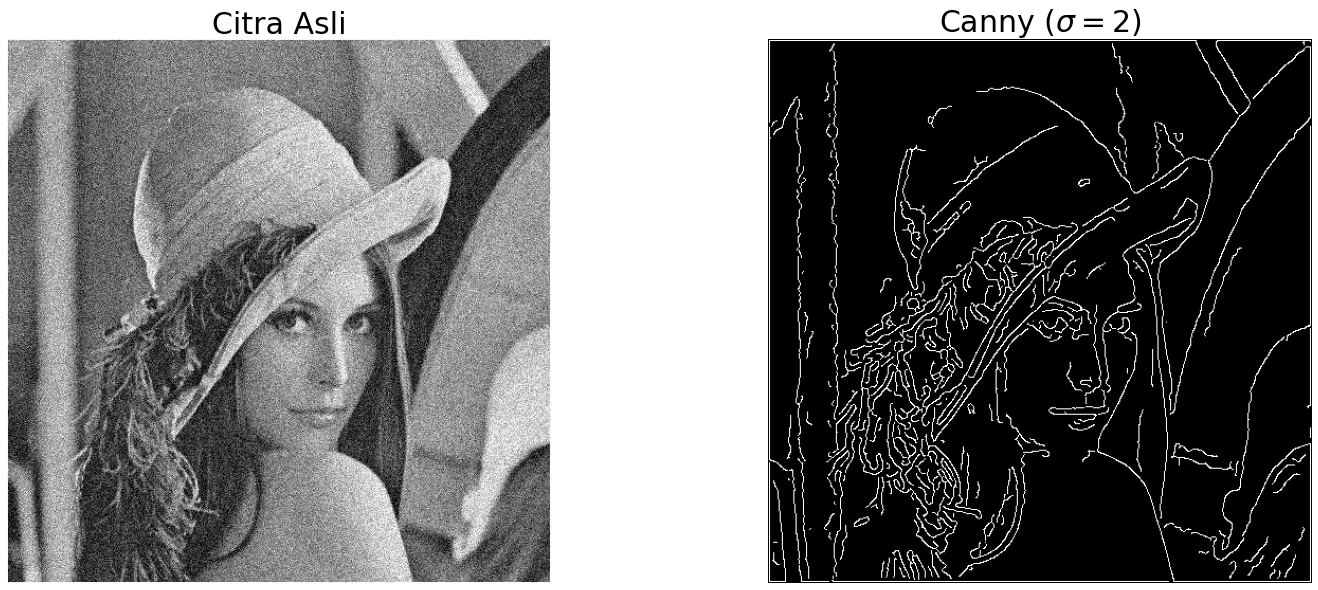

In [17]:
# Read image
img_lenaNoise = rgb2gray(imread('lena_noise.jpg'))

# Edge detector using Canny filter
img_lenaNoise_canny = feature.canny(img_lenaNoise, sigma=2)

# Displaying image
pylab.figure(figsize=(25,10))
pylab.subplot(121)
pylab.imshow(img_lenaNoise, cmap='gray')
pylab.axis('off')
pylab.title('Citra Asli', fontsize=30)
pylab.subplot(122)
pylab.imshow(img_lenaNoise_canny, cmap='gray')
pylab.axis('off')
pylab.title('Canny (' + r'$\sigma = 2$' + ')', fontsize=30)
pylab.show()

## Nomor 4<a class="anchor" id="num4"></a>
---

4. Lakukan deteksi tepi pada citra **lena_noise.jpg** dengan terlebih dahulu melakukan _median_ filter dilanjutkan dengan filter _Canny_.

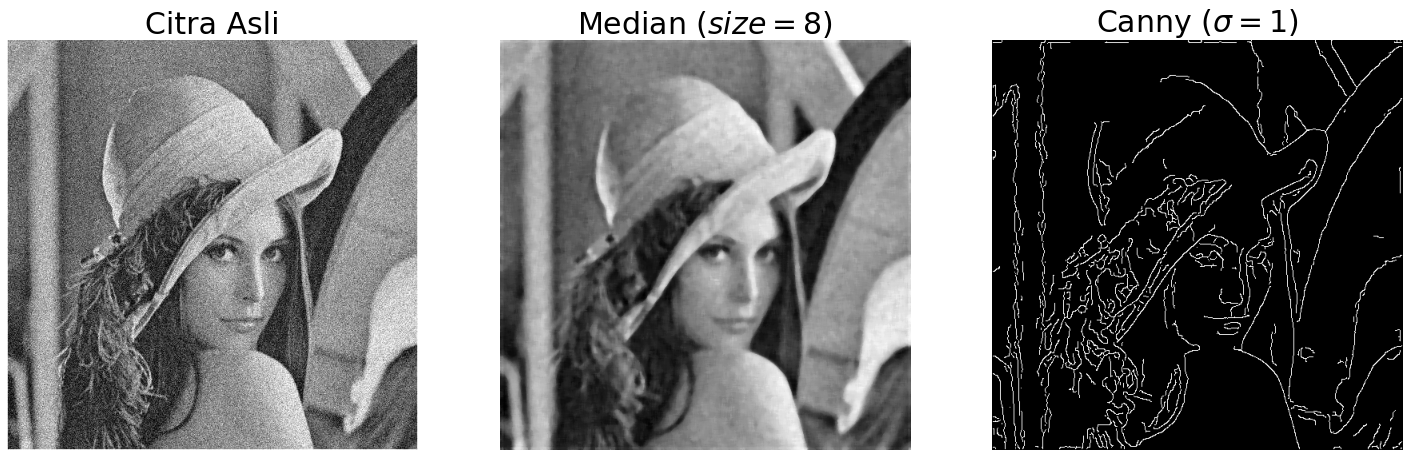

In [18]:
# Read images
img_lenaNoise = rgb2gray(imread('lena_noise.jpg'))

# Denoising using Median filter
img_lenaNoise_median = median_filter(img_lenaNoise, size=8)

# Edge detector using Canny filter
img_lenaNoise_medianCanny = feature.canny(img_lenaNoise_median, sigma=1)

# Displaying image
pylab.figure(figsize=(25,10))
pylab.subplot(131)
pylab.imshow(img_lenaNoise, cmap='gray')
pylab.axis('off')
pylab.title('Citra Asli', fontsize=30)
pylab.subplot(132)
pylab.imshow(img_lenaNoise_median, cmap='gray')
pylab.axis('off')
pylab.title('Median (' + r'$size = 8$' + ')', fontsize=30)
pylab.subplot(133)
pylab.imshow(img_lenaNoise_medianCanny, cmap='gray')
pylab.axis('off')
pylab.title('Canny (' + r'$\sigma = 1$' + ')', fontsize=30)
pylab.show()

<div style=" text-align: center; margin-top: 50px;">
    <a class="button" 
       href="#tableOfContents" 
       style="border: none; 
          background-color: inherit;
          padding: 7px 14px;
          font-size: 16px;
          border-radius: 11px;
          cursor: pointer;
          display: inline-block;
          background-color: dodgerblue;
          color: white;">
        Kembali ke "Table of Contents"
    </a><br>
    <h5 style="color:gray;
               margin-top: 30px;">
        Iman Mustika Ismail ©2022
    </h5>
</div>